<a href="https://colab.research.google.com/github/NomNomNarang/MachineLearning/blob/main/machineLearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#svm(supoort vector machine)

import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target']=iris.target

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.svm import SVC

ir=load_iris()

df=pd.DataFrame(ir.data,columns=ir.feature_names)
df.head()

df['target']=ir.target

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,ir.target,test_size=0.2)

In [ ]:
model=svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [ ]:
##cross val
from sklearn.model_selection import cross_val_score
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),df,ir.target,cv=5)

array([1., 1., 1., 1., 1.])

In [ ]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),df,ir.target,cv=5)

array([1., 1., 1., 1., 1.])

In [ ]:
cross_val_score(svm.SVC(kernel='linear',C=20,gamma='auto'),df,ir.target,cv=5)

array([1., 1., 1., 1., 1.])

In [ ]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),df,ir.target,cv=5)

array([1., 1., 1., 1., 1.])

In [ ]:
kernels=['rbf','linear']
C=[1,10,20]
avg_scores={}
for kval in kernels:
  for cval in C:
    cv_scores=cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),df,ir.target,cv=5)
    avg_scores[kval+'_'+str(cval)]=np.average(cv_scores)
avg_scores

{'rbf_1': np.float64(1.0),
 'rbf_10': np.float64(1.0),
 'rbf_20': np.float64(1.0),
 'linear_1': np.float64(1.0),
 'linear_10': np.float64(1.0),
 'linear_20': np.float64(1.0)}

In [ ]:
##GRID SEARCH CV
from sklearn.model_selection import GridSearchCV

clf=GridSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False)
clf.fit(df,ir.target)
clf.cv_results_

{'mean_fit_time': array([0.00384517, 0.00696692, 0.00474515, 0.00432253, 0.00671439,
        0.00842476]),
 'std_fit_time': array([0.0002788 , 0.00194984, 0.00144247, 0.00194463, 0.00262627,
        0.0030848 ]),
 'mean_score_time': array([0.00275097, 0.00555096, 0.00307488, 0.00432878, 0.00544429,
        0.00512815]),
 'std_score_time': array([8.91200357e-05, 1.73683315e-03, 1.01959777e-03, 2.23203505e-03,
        4.04394611e-03, 2.04324587e-03]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'li

In [ ]:
dff=pd.DataFrame(clf.cv_results_)
dff

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003845,0.000279,0.002751,0.000089,1,rbf,"{'C': 1, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.006967,0.001950,0.005551,0.001737,1,linear,"{'C': 1, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.004745,0.001442,0.003075,0.001020,10,rbf,"{'C': 10, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.004323,0.001945,0.004329,0.002232,10,linear,"{'C': 10, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.006714,0.002626,0.005444,0.004044,20,rbf,"{'C': 20, 'kernel': 'rbf'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,0.008425,0.003085,0.005128,0.002043,20,linear,"{'C': 20, 'kernel': 'linear'}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [ ]:
clf.best_score_

np.float64(1.0)

In [ ]:
##randomized search cv

from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(svm.SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,return_train_score=False,n_iter=2)
rs.fit(df,ir.target)

rs.cv_results_

{'mean_fit_time': array([0.00686498, 0.00818281]),
 'std_fit_time': array([0.00504565, 0.00287357]),
 'mean_score_time': array([0.00321922, 0.00650234]),
 'std_score_time': array([0.00038853, 0.00248691]),
 'param_kernel': masked_array(data=['rbf', 'rbf'],
              mask=[False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'param_C': masked_array(data=[1, 20],
              mask=[False, False],
        fill_value=999999),
 'params': [{'kernel': 'rbf', 'C': 1}, {'kernel': 'rbf', 'C': 20}],
 'split0_test_score': array([1., 1.]),
 'split1_test_score': array([1., 1.]),
 'split2_test_score': array([1., 1.]),
 'split3_test_score': array([1., 1.]),
 'split4_test_score': array([1., 1.]),
 'mean_test_score': array([1., 1.]),
 'std_test_score': array([0., 0.]),
 'rank_test_score': array([1, 1], dtype=int32)}

In [ ]:
data=pd.DataFrame(rs.cv_results_)
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006865,0.005046,0.003219,0.000389,rbf,1,"{'kernel': 'rbf', 'C': 1}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.008183,0.002874,0.006502,0.002487,rbf,20,"{'kernel': 'rbf', 'C': 20}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# Load dataset
d = load_digits()
X = d.data  # 4 features

# Create PCA to reduce to 2 features
pca = PCA(10)
X_reduced = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)


Original shape: (1797, 64)
Reduced shape: (1797, 10)


In [ ]:
x=load_digits()
x=df

In [ ]:
x.data[10].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

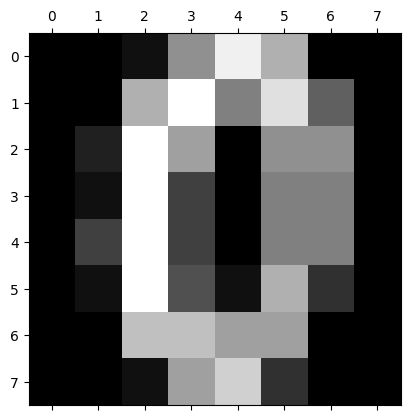

In [ ]:
plt.gray()
plt.matshow(x.data[10].reshape(8,8))

In [ ]:
np.unique(x.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
x.target[10] #this tells us about the target present at that particular value

np.int64(0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00, -1.22474487e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00, -1.22474487e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00

In [ ]:
pca.n_components_

10